# Prediction of concrete sulfate resistance

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

### Load sulfate dataset

In [2]:
dataset = r"C:\Users\Admin\Desktop\Final Year Project\sulfate\sulfate-data.xlsx"
raw_data = pd.read_excel(dataset, sheet_name= "Sheet1")
raw_data.head(10)

,water-binder ratio w/b,cement content (%),sulfate concentration (%),water content (%),sand content (%),Fly ash (%),Silicon Fume (%),Super Plasticizer (%),Natural Pozzolan (%),Slag (%),Coarse aggregate (%),exposure time (days),ultimate compressive strength (MPa),Percentage decrease in strength (%)
0,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0,36.51,0.00
1,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,5,36.93,-1.15
2,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,10,37.26,-2.05
3,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,15,37.88,-3.75
4,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,20,38.31,-4.93
5,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,25,38.66,-5.89
6,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,30,38.91,-6.57
7,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,35,38.72,-6.05
8,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,40,38.54,-5.56
9,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,45,38.33,-4.98


### Data Exporation And Cleaning

In [3]:
# Checking the number of rows and columns

rows, cols = raw_data.shape
print("This data has {} rows and {} columns".format(rows, cols))

This data has 836 rows and 14 columns


In [4]:
# dataset column names

raw_data.columns

Index(['water-binder ratio w/b', 'cement content (%)',
       'sulfate concentration (%)', 'water content (%)', 'sand content (%)',
       'Fly ash (%)', 'Silicon Fume (%)', 'Super Plasticizer (%)',
       'Natural Pozzolan (%)', 'Slag (%)', 'Coarse aggregate (%)',
       'exposure time (days)', 'ultimate compressive strength (MPa)',
       'Percentage decrease in strength (%)'],
      dtype='object')

In [5]:
# dataset information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   water-binder ratio w/b               836 non-null    float64
 1   cement content (%)                   836 non-null    float64
 2   sulfate concentration (%)            836 non-null    float64
 3   water content (%)                    836 non-null    float64
 4   sand content (%)                     836 non-null    float64
 5   Fly ash (%)                          836 non-null    float64
 6   Silicon Fume (%)                     836 non-null    float64
 7   Super Plasticizer (%)                836 non-null    float64
 8   Natural Pozzolan (%)                 836 non-null    float64
 9   Slag (%)                             836 non-null    float64
 10  Coarse aggregate (%)                 836 non-null    float64
 11  exposure time (days)            

In [6]:
# Percentage of null values in each columns

for col in raw_data.columns:
    pct_nan = (raw_data[col].isna().sum() / raw_data[col].count()) * 100
    print(f'{col} has {pct_nan:.2f}% NaN values')

water-binder ratio w/b has 0.00% NaN values
cement content (%) has 0.00% NaN values
sulfate concentration (%) has 0.00% NaN values
water content (%) has 0.00% NaN values
sand content (%) has 0.00% NaN values
Fly ash (%) has 0.00% NaN values
Silicon Fume (%) has 0.00% NaN values
Super Plasticizer (%) has 0.00% NaN values
Natural Pozzolan (%) has 0.00% NaN values
Slag (%) has 0.00% NaN values
Coarse aggregate (%) has 0.00% NaN values
exposure time (days) has 0.00% NaN values
ultimate compressive strength (MPa) has 0.00% NaN values
Percentage decrease in strength (%) has 0.00% NaN values


In [7]:
#check the number of duplicates and remove them

print(f"The number of duplicate are:{sum(raw_data.duplicated())}")

raw_data = raw_data.drop_duplicates()

The number of duplicate are:6


In [8]:
# Remove Uneccesary columns

columns_to_check = ['Silicon Fume (%)', 'Natural Pozzolan (%)', 'Super Plasticizer (%)', 'Slag (%)']

# Keep only rows where these columns have zero values
raw_data_filtered = raw_data[(raw_data['Silicon Fume (%)'] == 0) &
                 (raw_data['Natural Pozzolan (%)'] == 0) &
                 (raw_data['Super Plasticizer (%)'] == 0) &
                 (raw_data['Slag (%)'] == 0)]

# Drop the columns after filtering
raw_data = raw_data_filtered.drop(columns=columns_to_check)


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 835
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   water-binder ratio w/b               788 non-null    float64
 1   cement content (%)                   788 non-null    float64
 2   sulfate concentration (%)            788 non-null    float64
 3   water content (%)                    788 non-null    float64
 4   sand content (%)                     788 non-null    float64
 5   Fly ash (%)                          788 non-null    float64
 6   Coarse aggregate (%)                 788 non-null    float64
 7   exposure time (days)                 788 non-null    int64  
 8   ultimate compressive strength (MPa)  788 non-null    float64
 9   Percentage decrease in strength (%)  788 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 67.7 KB


In [10]:
raw_data.describe()

,water-binder ratio w/b,cement content (%),sulfate concentration (%),water content (%),sand content (%),Fly ash (%),Coarse aggregate (%),exposure time (days),ultimate compressive strength (MPa),Percentage decrease in strength (%)
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,0.472107,21.355102,8.270939,9.678680,58.907424,0.378249,9.677766,177.262690,45.273617,7.306865
std,0.139439,6.573105,5.815580,1.872397,15.969278,1.081052,20.301531,168.134108,25.689531,32.682025
min,0.280000,7.760000,0.000000,6.010000,13.300000,0.000000,0.000000,0.000000,3.170000,-144.080000
25%,0.280000,18.000000,2.000000,8.550000,60.810000,0.000000,0.000000,75.000000,24.317500,-3.770000
50%,0.500000,21.180000,10.000000,10.590000,68.230000,0.000000,0.000000,165.000000,39.975000,4.140000
75%,0.650000,30.630000,16.300000,12.000000,70.000000,0.000000,0.000000,255.000000,67.120000,26.357500
max,0.650000,30.630000,16.300000,12.000000,70.000000,5.160000,65.280000,1825.000000,90.450000,91.330000


### Graphs

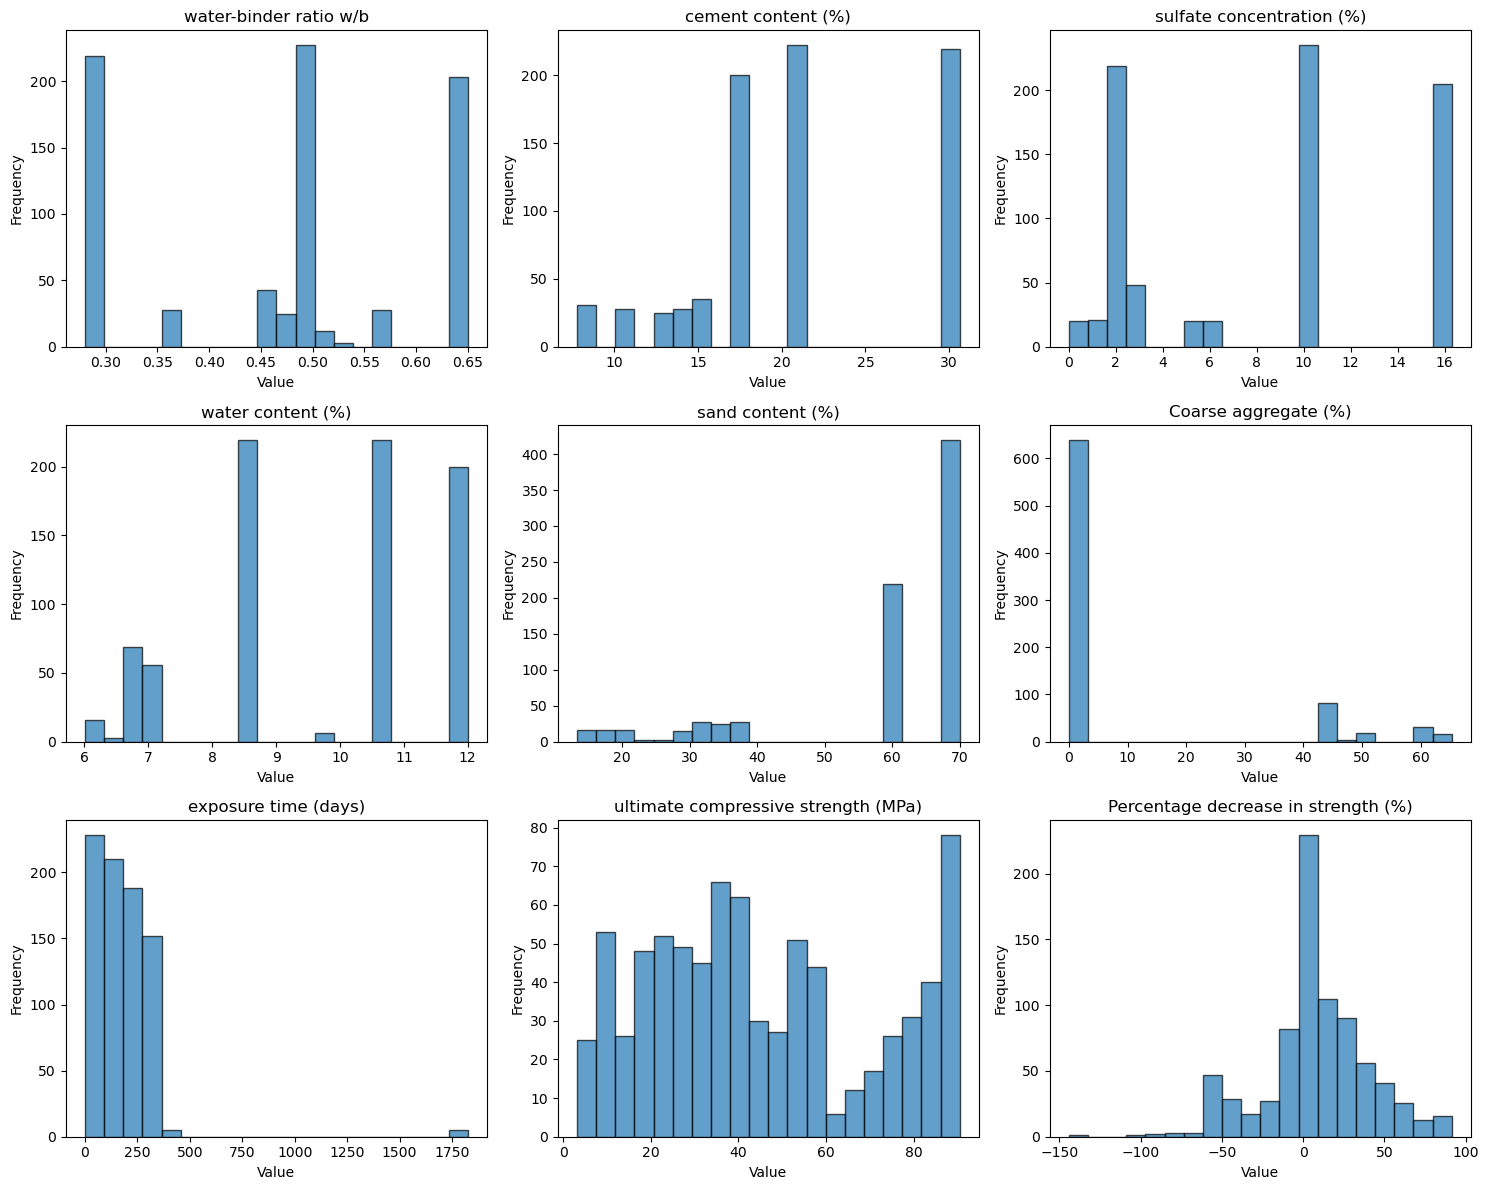

In [11]:
numeric_columns =['water-binder ratio w/b', 'cement content (%)',
       'sulfate concentration (%)', 'water content (%)', 'sand content (%)', 'Coarse aggregate (%)',
       'exposure time (days)', 'ultimate compressive strength (MPa)',
       'Percentage decrease in strength (%)']

# Set up the figure and axes
num_columns = len(numeric_columns)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()

# # Plot histograms
for i, column in enumerate(numeric_columns):
    if column in raw_data.columns:
        axs[i].hist(raw_data[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
        axs[i].set_title(column)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
    else:
        axs[i].axis('off')  # Turn off unused subplots

# # Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


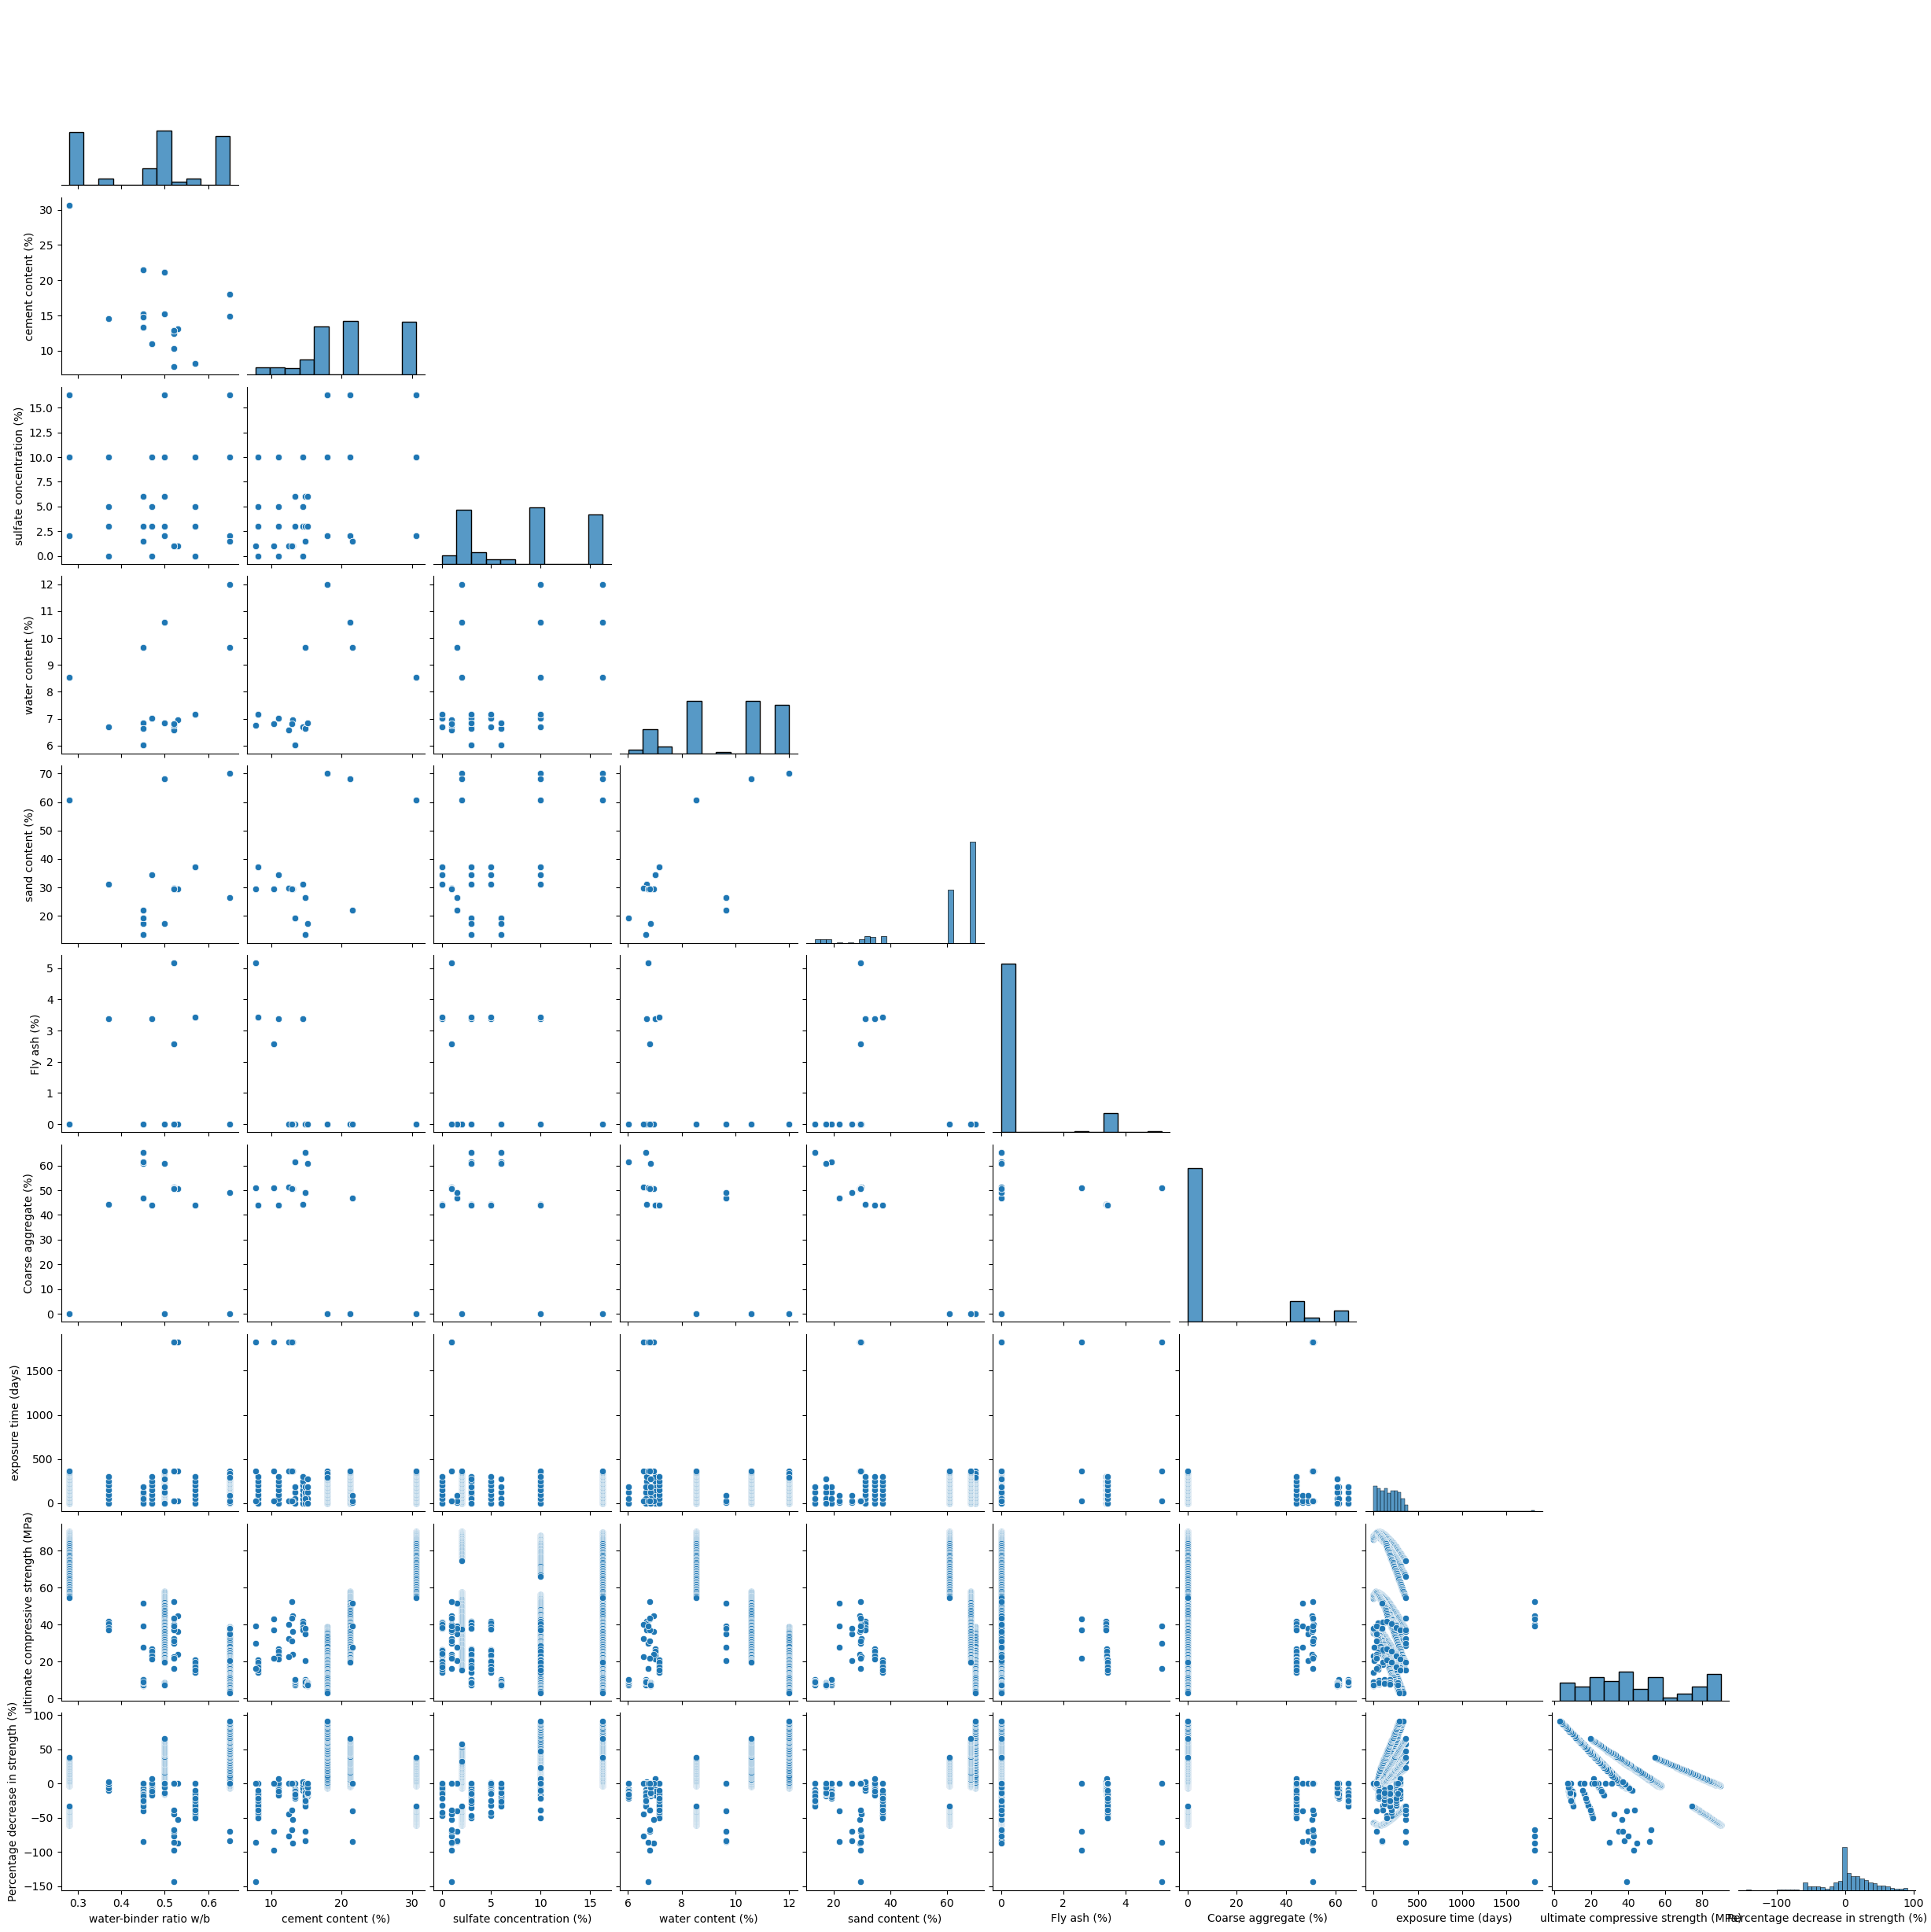

In [12]:
sns.pairplot(data=raw_data, corner=True)
plt.show()

In [13]:
raw_data.corr()

,water-binder ratio w/b,cement content (%),sulfate concentration (%),water content (%),sand content (%),Fly ash (%),Coarse aggregate (%),exposure time (days),ultimate compressive strength (MPa),Percentage decrease in strength (%)
water-binder ratio w/b,1.000000,-0.738796,-0.036459,0.668864,0.219152,0.005661,0.005013,-0.004685,-0.806043,0.453059
cement content (%),-0.738796,1.000000,0.248541,-0.019389,0.420877,-0.551258,-0.623885,-0.017508,0.872407,-0.108388
sulfate concentration (%),-0.036459,0.248541,1.000000,0.234251,0.335056,-0.239800,-0.352889,-0.059821,0.053933,0.502853
water content (%),0.668864,-0.019389,0.234251,1.000000,0.838497,-0.511748,-0.718181,-0.042750,-0.227181,0.592258
sand content (%),0.219152,0.420877,0.335056,0.838497,1.000000,-0.547928,-0.971051,-0.006404,0.256085,0.456972
Fly ash (%),0.005661,-0.551258,-0.239800,-0.511748,-0.547928,1.000000,0.603482,0.028069,-0.239044,-0.269018
Coarse aggregate (%),0.005013,-0.623885,-0.352889,-0.718181,-0.971051,0.603482,1.000000,0.013152,-0.450404,-0.364589
exposure time (days),-0.004685,-0.017508,-0.059821,-0.042750,-0.006404,0.028069,0.013152,1.000000,-0.081749,0.051733
ultimate compressive strength (MPa),-0.806043,0.872407,0.053933,-0.227181,0.256085,-0.239044,-0.450404,-0.081749,1.000000,-0.465361
Percentage decrease in strength (%),0.453059,-0.108388,0.502853,0.592258,0.456972,-0.269018,-0.364589,0.051733,-0.465361,1.000000


<Axes: >

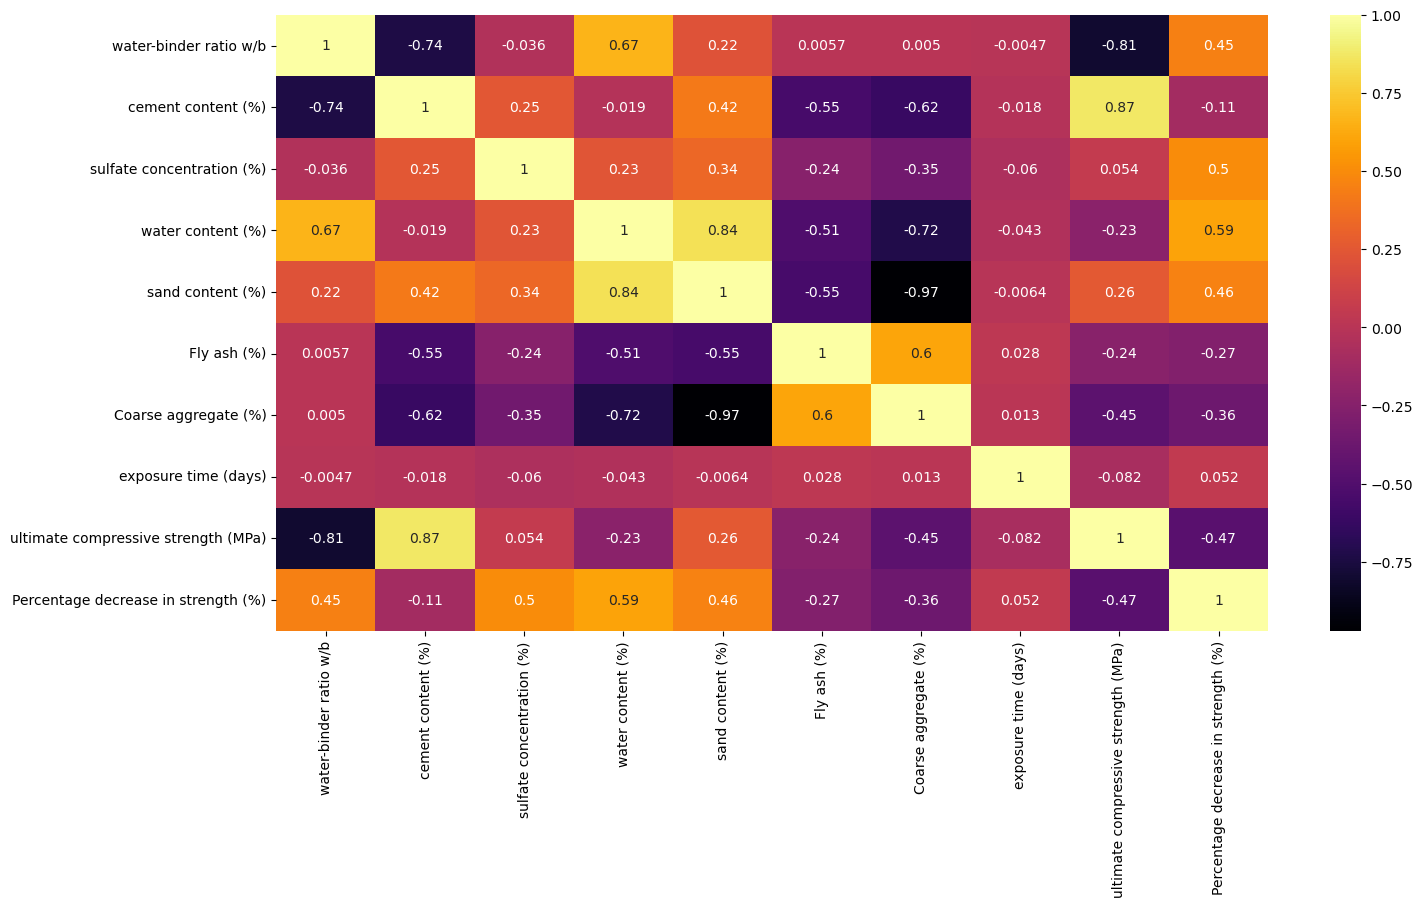

In [14]:
plt.figure(figsize=(16, 8))
sns.heatmap(raw_data.corr(), annot=True, cmap='inferno')

### Key observations
- Ultimate Compressive Strength (MPa) and Exposure Time (Days): A negative correlation suggests that longer exposure times lead to lower compressive strength.
- Water Binder Ratio (w/b) and Cement Content (%) A negative correlation indicates that higher cement content is often associated with a lower water-binder ratio.

## Add New Features

In [15]:
raw_data['total_binder_content'] = (raw_data['cement content (%)'] + raw_data['Fly ash (%)'])
raw_data['aggregate_content'] = raw_data['sand content (%)'] + raw_data['Coarse aggregate (%)']
raw_data['binder_to_aggregate_ratio'] = raw_data['total_binder_content'] / raw_data['aggregate_content']
raw_data['age_strength_ratio'] = raw_data['ultimate compressive strength (MPa)'] / raw_data['exposure time (days)']
raw_data['water_cementitious_material_ratio'] = raw_data['water content (%)'] / raw_data['total_binder_content']


raw_data.head()

,water-binder ratio w/b,cement content (%),sulfate concentration (%),water content (%),sand content (%),Fly ash (%),Coarse aggregate (%),exposure time (days),ultimate compressive strength (MPa),Percentage decrease in strength (%),total_binder_content,aggregate_content,binder_to_aggregate_ratio,age_strength_ratio,water_cementitious_material_ratio
0,0.65,18.0,2.0,12.0,70.0,0.0,0.0,0,36.51,0.00,18.0,70.0,0.257143,inf,0.666667
1,0.65,18.0,2.0,12.0,70.0,0.0,0.0,5,36.93,-1.15,18.0,70.0,0.257143,7.386000,0.666667
2,0.65,18.0,2.0,12.0,70.0,0.0,0.0,10,37.26,-2.05,18.0,70.0,0.257143,3.726000,0.666667
3,0.65,18.0,2.0,12.0,70.0,0.0,0.0,15,37.88,-3.75,18.0,70.0,0.257143,2.525333,0.666667
4,0.65,18.0,2.0,12.0,70.0,0.0,0.0,20,38.31,-4.93,18.0,70.0,0.257143,1.915500,0.666667


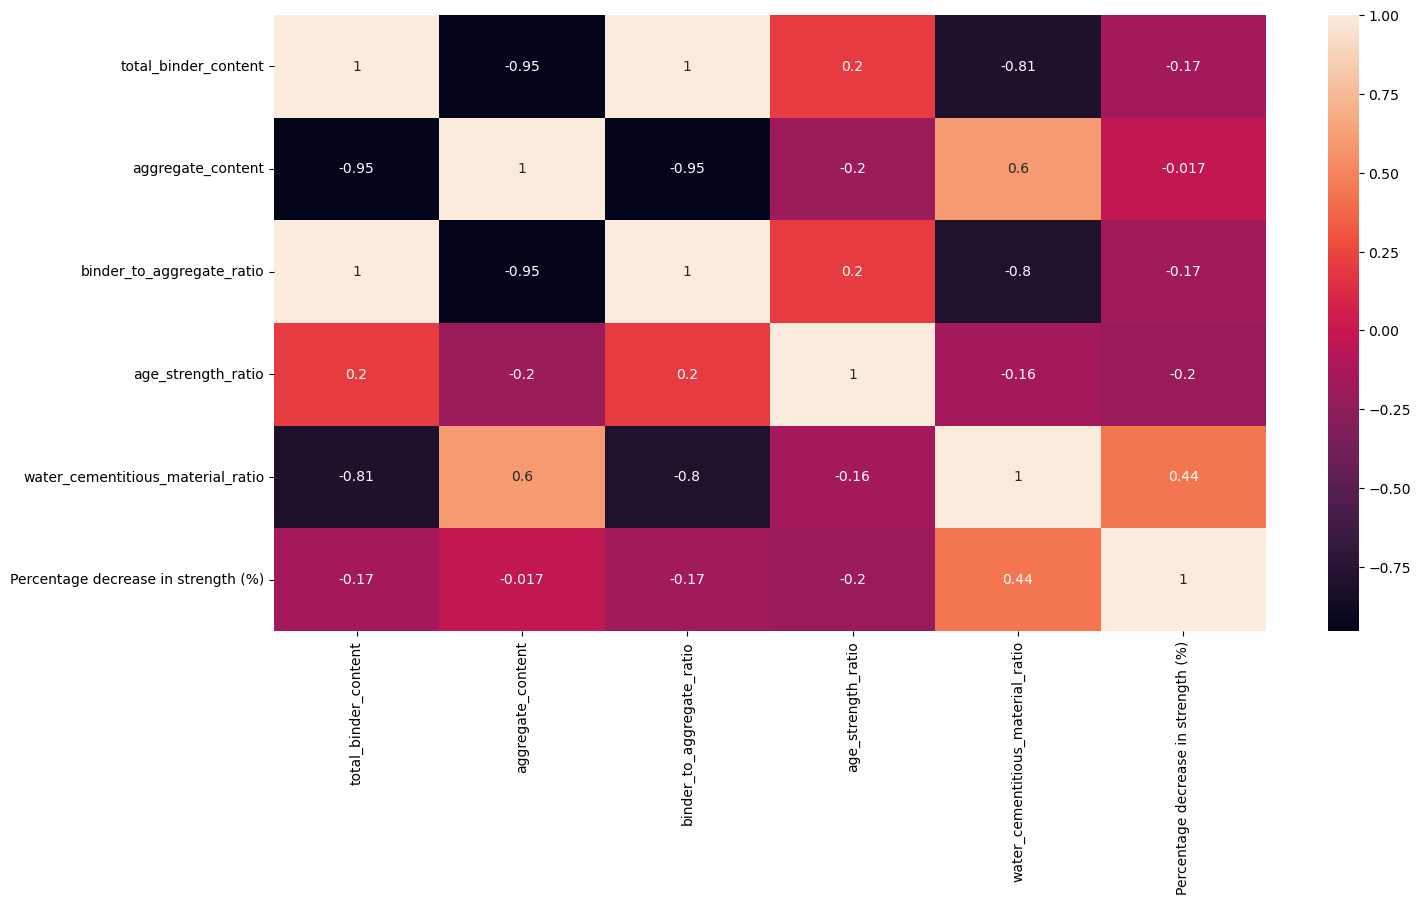

In [16]:
selected_columns = ['total_binder_content','aggregate_content','binder_to_aggregate_ratio','age_strength_ratio','water_cementitious_material_ratio', 'Percentage decrease in strength (%)']
correlation_matrix = raw_data[selected_columns].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Key Observations

- Total Binder Content: This suggests that increasing the amount of binder (cement and supplementary materials) can influence the Percentage decrease in strength

In [17]:
raw_data = raw_data.drop(['total_binder_content','aggregate_content','binder_to_aggregate_ratio','age_strength_ratio','water_cementitious_material_ratio'], axis=1)

In [18]:
# Calculate the correlation matrix
correlation_matrix = raw_data.corr()

# Extract the correlation values for 'Percentage decrease in strength (%)' and sort them
sorted_correlation = correlation_matrix['Percentage decrease in strength (%)'].sort_values(ascending=False)

# Display the sorted correlation values
print(sorted_correlation)


Percentage decrease in strength (%)    1.000000
water content (%)                      0.592258
sulfate concentration (%)              0.502853
sand content (%)                       0.456972
water-binder ratio w/b                 0.453059
exposure time (days)                   0.051733
cement content (%)                    -0.108388
Fly ash (%)                           -0.269018
Coarse aggregate (%)                  -0.364589
ultimate compressive strength (MPa)   -0.465361
Name: Percentage decrease in strength (%), dtype: float64


In [19]:
raw_data.columns

Index(['water-binder ratio w/b', 'cement content (%)',
       'sulfate concentration (%)', 'water content (%)', 'sand content (%)',
       'Fly ash (%)', 'Coarse aggregate (%)', 'exposure time (days)',
       'ultimate compressive strength (MPa)',
       'Percentage decrease in strength (%)'],
      dtype='object')

### Data Preparation for Training

In [20]:
# import the necessary libraries

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score,GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import randint

In [21]:
# defining input and target variables

x,y = raw_data.drop(['Percentage decrease in strength (%)'], axis = 1), raw_data['Percentage decrease in strength (%)']

### Data splitting into Training, Validation and Test Data

In [22]:
# Splitting data into train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further splitting the train data into train (70%) and validation (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [23]:
# Min/Max Scaling of numeric features

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Model Training

In [24]:
# Models 

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
}

results = {'Model': [], 'Mean RMSE': [], 'Mean R2': [], 'Mean MAE':[]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define your k-fold

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_mean_rmse = np.sqrt(-scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    cv_r2_mean = np.mean(r2_scores)
    
    mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_absolute_error")
    cv_mae_mean = np.mean(mae_scores)
    
    results['Model'].append(model_name)
    results['Mean RMSE'].append(cv_mean_rmse)
    results['Mean R2'].append(cv_r2_mean)
    results['Mean MAE'].append(cv_mae_mean)

results_df = pd.DataFrame(results).sort_values('Mean R2', ascending=False)
print(results_df)

               Model  Mean RMSE   Mean R2  Mean MAE
1      Decision Tree   3.834300  0.985534 -1.845248
3            XGBoost   4.570032  0.980570 -2.126487
2      Random Forest   5.330072  0.976097 -1.970222
0  Linear Regression  12.502598  0.835759 -9.899074


Decision Tree is the best-performing model based on RMSE, R², and MAE.

### Hyperparameter Tuning for XGBoost

In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [26]:
# best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Calculate metrics
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)


print('Our Optimized XGBoostRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best score found:  -19.267127247982078
Our Optimized XGBoostRegressor got the following scores on the test set:
R-squared: 0.9548580782750067
MSE: 56.47070283311865
RMSE: 7.514699117936702
MAE: 2.2488388320030293


In [27]:
comparison_table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_table.head(20))

     Actual  Predicted
571   -2.77  -2.898518
39    21.83  21.832590
211   -3.92  -4.506354
199   91.04  89.305595
235    6.06   7.630691
215   -2.92  -3.097897
549   14.88  13.785404
351   -2.81  -1.939739
300    8.06   9.667152
137   86.94  86.591187
636   36.84  36.673744
218   -1.89  -1.791823
174   50.88  51.451538
445  -57.87 -57.707233
168   41.35  39.294460
67    52.48  52.918793
519    2.45   1.921695
423  -59.04 -55.807007
393   38.32  38.583225
823 -144.08 -66.264694


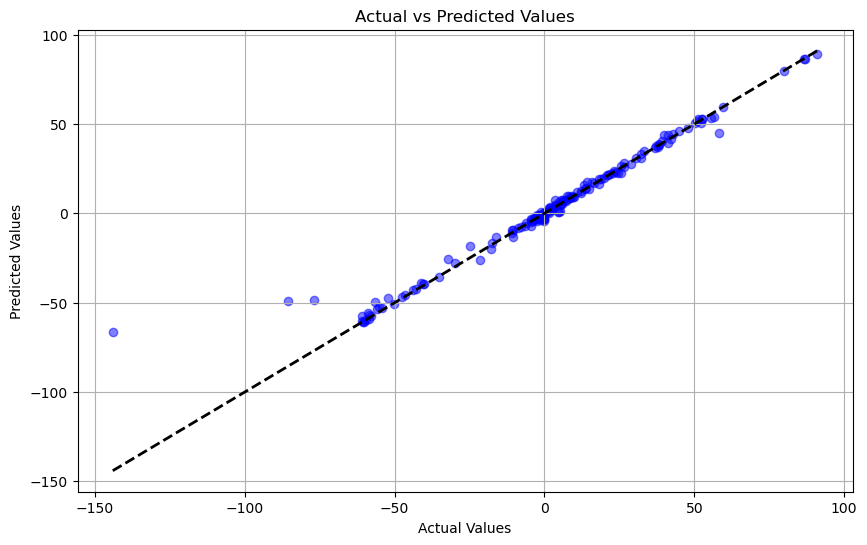

In [28]:
# Plotting actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

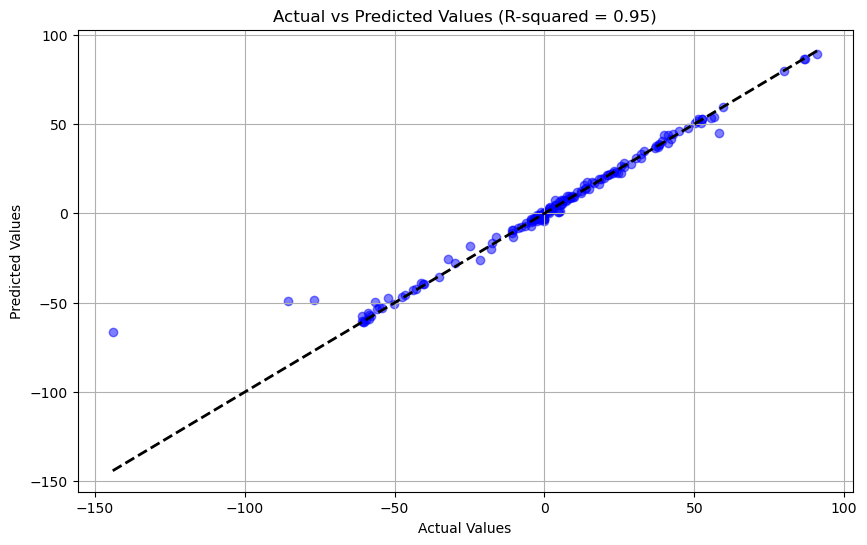

In [29]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actulues')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (R-squared = {:.2f})'.format(r_squared))
plt.grid(True)
plt.show()

#### R-squared of 0.94

I think we can be quite pleased with this result. This can be interpreted as: Our model can account for 94% of the variance in the data. 

### Feature Importances
Here we get a look at how much each input variable factored in to our final model.

In [30]:
# Create a dataframe showing the feature importances

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
3,water content (%),0.463894
5,Fly ash (%),0.113833
2,sulfate concentration (%),0.095025
4,sand content (%),0.090443
0,water-binder ratio w/b,0.087056
1,cement content (%),0.063509
7,exposure time (days),0.042762
8,ultimate compressive strength (MPa),0.027497
6,Coarse aggregate (%),0.015982


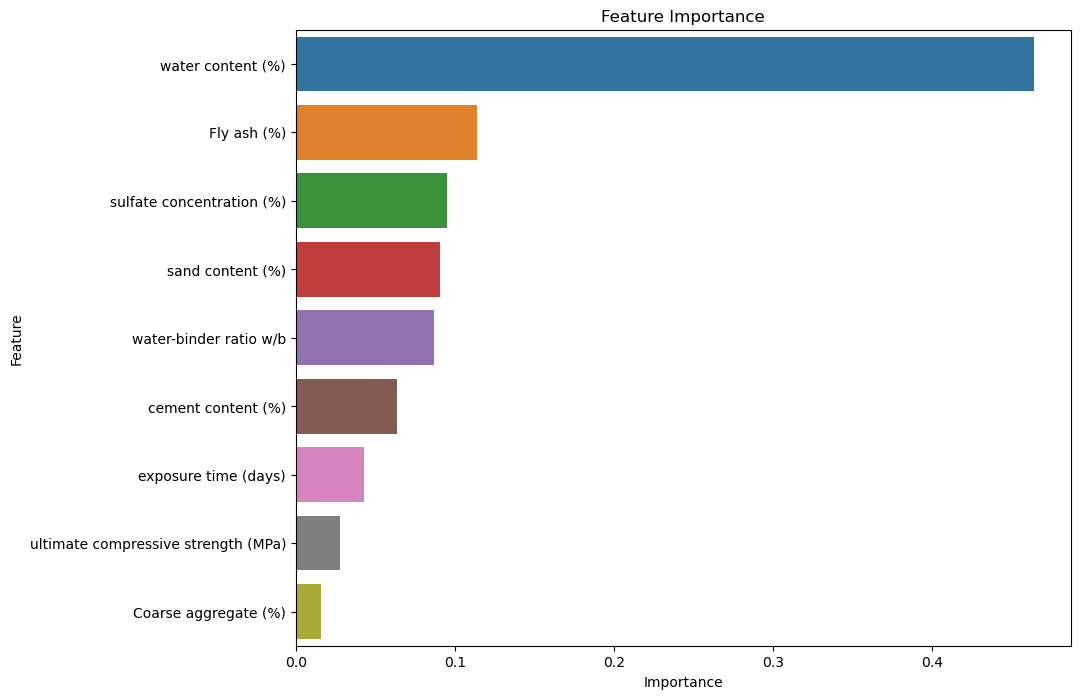

In [31]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show the plot
plt.show()

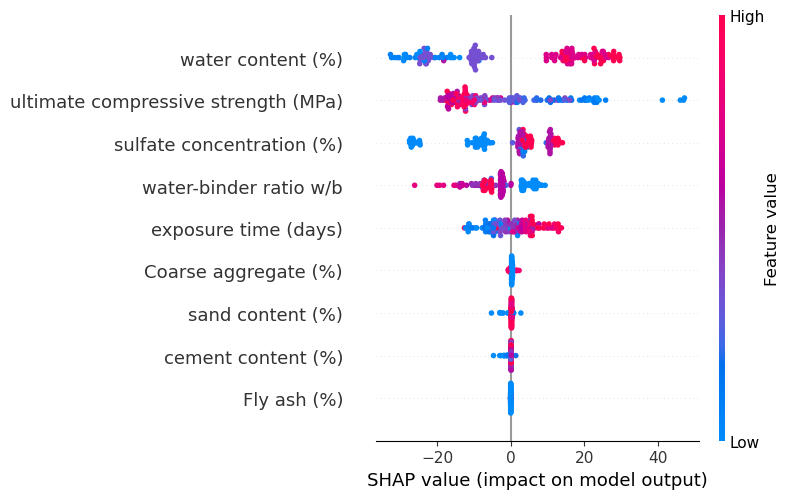

In [32]:
import shap

model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# Generate summary plot
shap.summary_plot(shap_values, X_test,feature_names=x.columns)

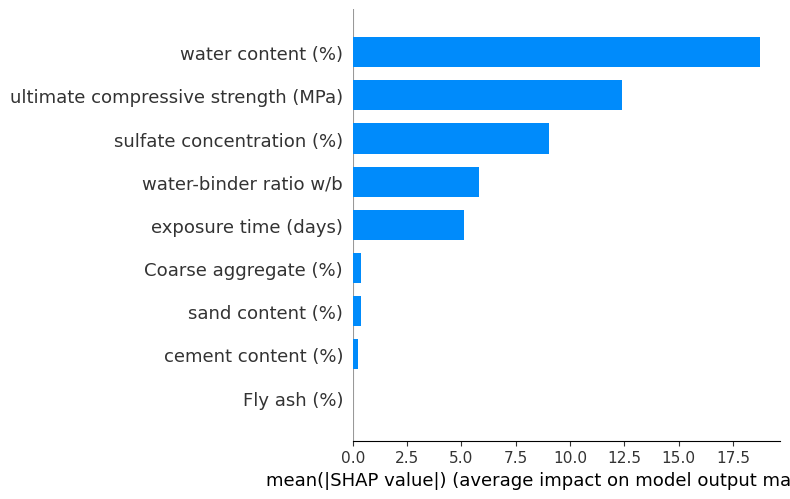

In [33]:
shap.summary_plot(shap_values,  plot_type='bar', feature_names=x.columns, show=False)
plt.show()

In [34]:
# Create a DataFrame with the SHAP values
shap_df = pd.DataFrame(shap_values, columns=x.columns)

# Display the DataFrame
shap_df.head() 

,water-binder ratio w/b,cement content (%),sulfate concentration (%),water content (%),sand content (%),Fly ash (%),Coarse aggregate (%),exposure time (days),ultimate compressive strength (MPa)
0,4.885773,0.095567,12.009349,-9.278293,0.179778,0.000024,0.336058,-5.449672,-14.119034
1,-7.136977,0.120681,-6.987348,23.997442,0.160804,-0.000232,0.245123,1.565240,2.081284
2,-2.293387,0.106249,-9.227450,22.373203,0.206083,0.000228,0.276342,-6.723958,-16.911997
3,-5.378802,-0.023622,3.945094,29.599974,0.084489,-0.002320,0.193734,5.354841,47.204773
4,-2.536961,0.114736,-9.374754,25.148045,0.205293,0.000228,0.274161,2.516344,-18.462101
